# Welcome to Machine Learning!<br>
As Deep Learning and AI, Machine Learning is currently a buzzword in the news and media. Many people praise Machine Learning, without even knowing what it is.<br>
Wikipedia defines Machine Learning as: "a subset of Artificial Intelligence in the field of Computer Science that often uses statistical techniques to give computers the ability to "learn" with data, without being explicitly programmed." As when you were a kid, you needed to see a handful of cats in order to say with certainty that something is a cat. Same is with computers. Before the computer can say something is a cat, we show it several examples of what a cat is, instead of programming the rules of what a cat looks like.<br>
Of course, this was more of a problem in the Deep Learning section, but there are some tasks where Machine Learning specifically is useful:<br>
<ul><li>classification - predicting which class some instance belongs to</li>
    <li>regression - predicting a numerical target feature</li>
    <li>clustering - grouping similar instances into the same groups/clusters</li>
    <li>anomaly detection - detecting which instances are greatly different than the rest</li>
    <li>recommender systems - based on the history of a user, predict what he/she will like</li>
</ul>and so much more...<br><br>
Machine Learning can also be divided by the type of learning, but the main two are:
<ul><li>supervised - when the target feature is known before we predict it</li>
    <li>unsupervised - when the target feature isn't known</li></ul><br>
In this section, we'll be doing a binary classification, which is supervised learning. We'll use the same data as before.<br>
The new library, we'll be trying out is <a href='https://scikit-learn.org/stable/index.html'>sci-kit learn</a>.

## Step 1: Preprocessing

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data/churn.csv')
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Before we can jump straight into Machine Learning, we need to preprocess our data. Why? Because Machine Learning algorithms can't use textual data, meaning our yes/no features are useless. Maybe we have some missing values which need to be filled before we can use them, and so on.<br>
Firstly, we're going to turn those yes/no features into zeroes and ones and turn the `Phone` feature into an index column.

In [3]:
df['Int\'l Plan'] = df['Int\'l Plan'].map({'yes': 1, 'no': 0})
df['VMail Plan'] = df['VMail Plan'].map({'yes': 1, 'no': 0})
df['Churn?'] = df['Churn?'].astype('int64')
df.set_index(df['Phone'], inplace=True)
df.drop(['Phone'], axis = 1, inplace=True)

df.head()

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
Phone,,,,,,,,,,,,,,,,,,,,
382-4657,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
371-7191,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
358-1921,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
375-9999,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
330-6626,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Since `State` feature has more than 50 unique values and `Area Code` three, for now, we'll just drop them. Of course, there are certain methodologies for handling such data, but that is out of scope for this particular section.

In [4]:
df.drop(['State'], axis=1, inplace=True)
df.drop(['Area Code'], axis=1, inplace=True)

Lastly, we'll need to split our dataset into target data and data our model will use to predict that target. That's the format Machine Learning algorithms accept for training.

In [5]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X.head()

,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
Phone,,,,,,,,,,,,,,,,,
382-4657,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
371-7191,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
358-1921,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
375-9999,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
330-6626,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


## Step 2: Machine Learning<br>
In this section, we'll cover some of the most used Machine Learning algorithms such as Logistic Regression, k Nearest Neighbors and Decision Tree. All of those algorithms can be found in the `sci-kit learn` library (sklearn for short).

In [10]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X, y)

/home/stopwolf/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

With the help of fit method, our model learns from the data we provided so it can predict new targets for the new data we give it. The output of the fit model, as can be seen above, is a model with all of its hyperparameters. <b>Hyperparameters</b> are settings of the model we can tweak. By doing so, we can get even better final results. Before we get into measuring the "goodness" of our models, let's train a couple more. K Nearest Neighbor model:

In [11]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

And the Decision Tree model:

In [12]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier()
model_tree.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Step 3: Evaluation<br>

But how good are these models we created?<br>
In this section, we'll cover some of the most popular evaluation metrics like `accuracy`, `precision`, `recall` and `confusion matrix`. Since confusion matrix combines all of these, that'll be our starting point.<br>
<img src='img/confusion_matrix.png'><br>
We can use the same name function from `sci-kit learn` library to plot the confusion matrix.

Text(33.0, 0.5, 'True')

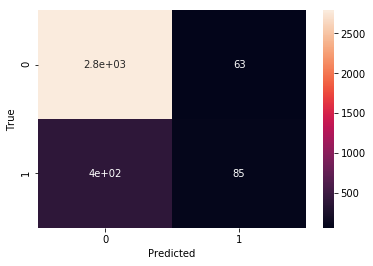

In [13]:
from sklearn.metrics import confusion_matrix

ax = plt.subplot()
sns.heatmap(confusion_matrix(y_true=y, y_pred=model_lr.predict(X)), ax=ax, annot = True)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')

Zeroes ,in this case, represent non-churners, and ones represent churners. Straight from this plot, we can see that the most common group is the non-churner group {row 0 and column 0}.<br>
But, what else can we derive from this confusion matrix? The answer is almost every other evaluation metric!<br>
You can use the above image of the confusion matrix, to check if these formulas are correct:<br><br>
The accuracy score: $ accuracy\ =\ \frac{TP+TN}{TN+FN+FP+TP} $<br>
The precision score: $ precision\ =\ \frac{TP}{TP+FP} $<br>
The recall score: $ recall\ =\ \frac{TP}{TP+FN}$<br>
"But what do these mean? And when shoud I use each of these?", you might be wondering. Let's investigate this.<br><br>
<b>Accuracy</b> is the most standard metric, but also one of the worst ones because it only looks at correctly classified instances. We ignore False Positives and False Negatives, which might be more important for our specific problem.<br>
For an example, if we were creating a spam detection app, if we say something IS spam and it wasn't, we're making a bigger mistake than the other way around - if we say something isn't spam and it actually is. That means, False Positive values are more important, so our metric should be appropriate for the spam detection problem. From the above formulas, we can see that <b>precision</b> uses FP values, which is why that would we a good metric for spam detection.<br><br>
In the real world, that case is really rare. We come across more examples where we should optimize our models for False Negative values. If we were predicting brain tumour, if we say this patient doesn't have a tumour, but he actually has one, our actions may result in that patient's death. But if we say he has a tumour, but he doesn't, he won't die from the treatment. In this case, we should optimize the <b>recall</b> score.<br>
Here's another graphic depiction of precision and recall:<br>
<img src='img/PrecisionRecall.svg.png'><br>
So, let's check how good our models did!

In [14]:
y_pred_lr = model_lr.predict(X)
y_pred_knn = model_knn.predict(X)
y_pred_tree = model_tree.predict(X)

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(f'Logistic Regression:{accuracy_score(y, y_pred_lr), precision_score(y, y_pred_lr), recall_score(y, y_pred_lr)}')
print(f'K Nearest Neighbors:{accuracy_score(y, y_pred_knn), precision_score(y, y_pred_knn), recall_score(y, y_pred_knn)}')
print(f'Decision Trees:{accuracy_score(y, y_pred_tree), precision_score(y, y_pred_tree), recall_score(y, y_pred_tree)}')

Logistic Regression:(0.8616861686168616, 0.5743243243243243, 0.17598343685300208)
K Nearest Neighbors:(0.8970897089708971, 0.8365384615384616, 0.36024844720496896)
Decision Trees:(1.0, 1.0, 1.0)


Hmm, it would seem that the `Decision Tree` model is the best! And not only best, but perfect!!<br>
Actually, sorry to break it to you, but that's not the case... This is called <b>overfitting</b>. It happens when our model learns every detail of our data and does a perfectly good job, but when new data arrives, it becomes terrible. And of course, there's a way to prevent this, using one of the most common practises which we skipped until now: train/test splitting.<br><br>
Splitting data into three sets is really common practise tool in Data Science. We split our original dataset into: train, development and test sets. As the names suggest, we train our model on the training data, develop and improve it using development data, and at the end we look how it performs on the test set.<br>
If we have less than 1.000.000 instances we should divide our dataset into sections of 80/10/10.<br>
If we have more than that, we can freely split into sections of 98/1/1.<br>
Even though there are three sets in that convention, we use only training and test sets. In our case, test is the development set.<br><br>
Let's split our dataset, and repeat our training and evaluation process.

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [19]:
model_lr = LogisticRegression()

model_lr.fit(X_train, y_train)
y_hat_lr = model_lr.predict(X_test)

/home/stopwolf/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [20]:
model_knn = KNeighborsClassifier()

model_knn.fit(X_train, y_train)
y_hat_knn = model_knn.predict(X_test)

In [21]:
model_tree = DecisionTreeClassifier()

model_tree.fit(X_train, y_train)
y_hat_tree = model_tree.predict(X_test)

In [24]:
print(f'Logistic Regression:{accuracy_score(y_test, y_hat_lr), precision_score(y_test, y_hat_lr), recall_score(y_test, y_hat_lr)}')
print(f'K Nearest Neighbors:{accuracy_score(y_test, y_hat_knn), precision_score(y_test, y_hat_knn), recall_score(y_test, y_hat_knn)}')
print(f'Decision Trees:{accuracy_score(y_test, y_hat_tree), precision_score(y_test, y_hat_tree), recall_score(y_test, y_hat_tree)}')

Logistic Regression:(0.854916067146283, 0.5142857142857142, 0.14754098360655737)
K Nearest Neighbors:(0.8741007194244604, 0.660377358490566, 0.28688524590163933)
Decision Trees:(0.9148681055155875, 0.6917293233082706, 0.7540983606557377)


As we can see, our `Decision Tree` isn't perfect anymore, but now, it's more useful. It also has higher precision AND recall scores than two other models.<br>
***
<b>Additional Resources:</b>
<ul><li>in-depth, fully mathematical description of algorithms we used here can be found <a href='https://www.dropbox.com/s/qiq2c85cle9ydb6/Chapter3.pdf?dl=0'>here</a></li>
    <li>sci-kit learn <a href='https://scikit-learn.org/stable/documentation.html'>documentation</a></li></ul>